# Merging all human datasets: PBMCs + Bone Marrow

In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import glob

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

results_file = './write/merged/Immune_ALL_human.h5ad'

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
file_paths = './write/'
adatas_pp = []
for i in glob.glob(file_paths+'*.h5ad'):
    print(i)
    adatas_pp.append(sc.read(i, cache=True)) 

./write/Oetjen_hum_BM_pp.h5ad
./write/Freytag_hum_PBMCs_pp.h5ad
./write/10X_hum_PBMCs_pp.h5ad
./write/Sun_hum_PBMCs_pp.h5ad
./write/Villani_hum_PBMCs_pp.h5ad


In [4]:
for i in range(len(adatas_pp)):
    print(adatas_pp[i].shape)

(9581, 22946)
(3347, 24576)
(10727, 22966)
(8829, 20390)
(1022, 22321)


In [5]:
# Concatenate to unique adata object
adata_pp = adatas_pp[0].concatenate(adatas_pp[1:], batch_key='sample_ID',
                                                        index_unique=None)

In [6]:
adata_pp.var.head()

,gene_id-0,n_cells-0,gene_ids-1,n_cells-1,gene_ids-2,feature_types-2,n_cells-2,gene_id-3,n_cells-3,n_cells-4
LINC00115,ENSG00000225880,192,ENSG00000225880,18,ENSG00000225880,Gene Expression,338,ENSG00000225880,101,52
FAM41C,ENSG00000230368,524,ENSG00000230368,8,ENSG00000230368,Gene Expression,307,ENSG00000230368,240,44
SAMD11,ENSG00000187634,17,ENSG00000187634,1,ENSG00000187634,Gene Expression,9,ENSG00000187634,11,45
NOC2L,ENSG00000188976,1739,ENSG00000188976,396,ENSG00000188976,Gene Expression,2554,ENSG00000188976,1283,653
KLHL17,ENSG00000187961,52,ENSG00000187961,10,ENSG00000187961,Gene Expression,251,ENSG00000187961,30,24


In [7]:
adata_pp.obs.head()

,batch,chemistry,data_type,dpt_pseudotime_y,final_annotation,mt_frac,n_counts,n_genes,sample_ID,size_factors,species,study,tissue
index,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A,Oetjen_A,v2_10X,UMI,NaN,CD16+ Monocytes,0.047970,6379.0,1862.0,0,0.939366,Human,Oetjen,Bone_Marrow
AAACCTGCATGTCCTC-1-Oetjen_A,Oetjen_A,v2_10X,UMI,NaN,CD4+ T cells,0.024928,4172.0,1082.0,0,0.450271,Human,Oetjen,Bone_Marrow
AAACCTGGTCGACTGC-1-Oetjen_A,Oetjen_A,v2_10X,UMI,NaN,CD14+ Monocytes,0.051907,6608.0,1618.0,0,0.747701,Human,Oetjen,Bone_Marrow
AAACCTGGTCGCTTCT-1-Oetjen_A,Oetjen_A,v2_10X,UMI,NaN,CD14+ Monocytes,0.041716,5034.0,1413.0,0,0.620114,Human,Oetjen,Bone_Marrow
AAACCTGTCCCGACTT-1-Oetjen_A,Oetjen_A,v2_10X,UMI,NaN,NKT cells,0.043522,3998.0,1127.0,0,0.468185,Human,Oetjen,Bone_Marrow


In [8]:
adata_pp.shape

(33506, 12303)

In [9]:
adata_pp.write(results_file)

... storing 'batch' as categorical
... storing 'chemistry' as categorical
... storing 'data_type' as categorical
... storing 'final_annotation' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical
... storing 'feature_types-2' as categorical


In [10]:
adata_pp.layers.keys()

KeysView(Layers with keys: counts)

# Plotting cell cycle phases

In [3]:
adata = sc.read(results_file)

In [4]:
adata

AnnData object with n_obs × n_vars = 33506 × 12303 
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime_y', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'gene_id-0', 'n_cells-0', 'gene_ids-1', 'n_cells-1', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_id-3', 'n_cells-3', 'n_cells-4'
    layers: 'counts'

In [5]:
cell_cycle_genes = [x.strip() for x in open('../regev_lab_cell_cycle_genes.txt')]

In [7]:
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [8]:
sc.pp.scale(adata)

In [9]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs) (0:01:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs) (0:01:07)
-->     'phase', cell cycle phase (adata.obs)


In [10]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
    finished (0:01:22)


In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:12)
computing UMAP


/opt/conda/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:41)


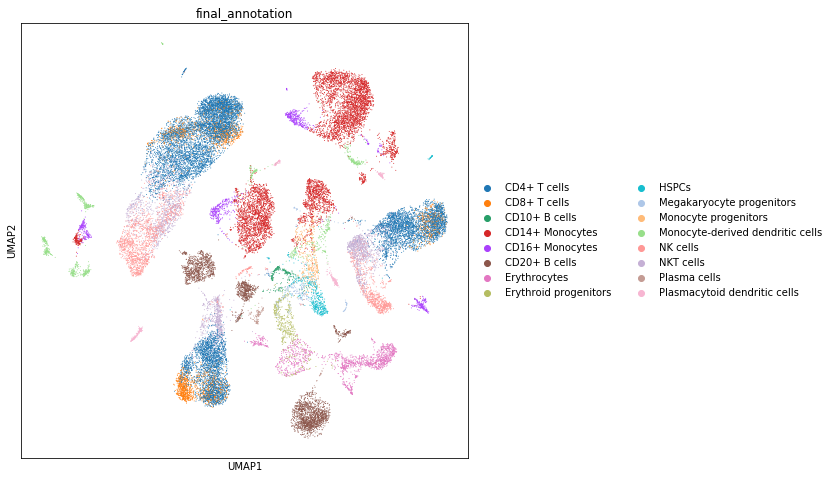

In [17]:
sc.pl.umap(adata, color='final_annotation', palette=sc.pl.palettes.vega_20_scanpy)

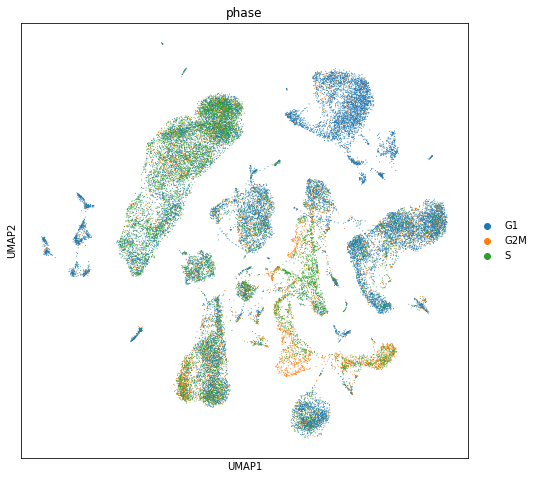

In [14]:
sc.pl.umap(adata, color='phase')